In [102]:
import numpy as np
import matplotlib.pyplot as plt
import ast
import math

In [154]:
class ODE_Solver:
    ''' Class to solve ODE: dy/dt = f(y, t). The predefined function, f(y, t), is e^t.
    The function can is an input argument and should be string containing Python expretion as a function of t only.
    Three methods are available: Euler, Runge Kutta 2snd order and Runge Kutta 4th order
    Parameters: 
    t0 : staring time
    tf : final simulation time
    f  : math function f(y, t), string
    y0 : initial condition at t0
    dt : time step'''

    def __init__(self, t0=0, tf=5, y0=1, dt=1, function = 'math.exp(t)'):
        self.t0 = t0
        self.tf = tf
        self.function = function
        self.y0 = y0
        self.dt = dt
        
    def evaluate_equation(self, equation, t):
        '''Takes the equation, f(y, t), as an argument and calculates the equation with the input value for t'''
        try:
            result = eval(equation)
            return result
        except Exception as e:
            print(f"\nError: {e}. The input function for f(y, t) should be a string containing a valid Python expression and a function of t only.")
            return f"\nError: {e}"

    def solve(self,  method='Euler'):
        '''select the solver'''
        match method:
            case 'Euler':
                return self.euler_method()
            case 'RK2':
                return self.runge_kutta_2nd()
            case 'RK4':
                return self.runge_kutta_4th()
            case other:
                print("Invalid method specified. valid methods are: 'Euler', 'RK2', 'RK4'")

    def euler_method(self):
        ''' solving the ODE with Euler method'''
        print(f" Euler method is used to solve dy/dt = {self.function}.")
        # List of time steps and results used and calculated.
        time = [self.t0]
        results = [self.y0]

        # start of the method
        t = self.t0
        self.y = self.y0

        while t < self.tf:
            #  approximate the next value usin Euler's method
            self.y += self.dt * self.evaluate_equation(self.function, t)
            # Increment time by dt
            t += self.dt
            #  Append the time-step and approximate to the lists
            time.append(t)
            results.append(self.y)

        return time, results

    def runge_kutta_2nd(self):
        ''' solving the ODE with runge_kutta 2nd order'''
        print(f" Runge_Kutta 2nd order method is used to solve dy/dt = {self.function}.")
                # List of time steps and results used and calculated.
        time = [self.t0]
        results = [self.y0]

        # start of the method
        t = self.t0
        self.y = self.y0

        while t < self.tf:
            # calculate the k values and approximate the next value 
            self.k1 = self.dt * self.evaluate_equation(self.function, t)
            k2 = self.dt * self.evaluate_equation(self.function + ' + 0.5 * self.k1', t + 0.5 * self.dt)
            self.y += k2
            #  increment time by dt
            t += self.dt
            #  Append the time-step and approximate to the lists
            time.append(t)
            results.append(self.y)
            
        return time, results

    def runge_kutta_4th(self):
        ''' solving the ODE with runge_kutta 4th order'''
        print(f" Runge_Kutta 4th order method is used to solve dy/dt = {self.function}.")
                # List of time steps and results used and calculated.
        time = [self.t0]
        results = [self.y0]

        # start of the method
        t = self.t0
        self.y = self.y0

        while t < self.tf:
            # calculate the k values and approximate the next value 
            self.k1 = self.dt * self.evaluate_equation(self.function, t)
            self.k2 = self.dt * self.evaluate_equation(self.function + ' + 0.5 * self.k1', t + 0.5 * self.dt)
            self.k3 = self.dt * self.evaluate_equation(self.function + ' + 0.5 * self.k2', t + 0.5 * self.dt)
            k4 = self.dt * self.evaluate_equation(self.function + ' + self.k3', t + self.dt)
            self.y += (self.k1 + 2 * self.k2 + 2 * self.k3 + k4) / 6
            #  increment time by dt
            t += self.dt
            #  Append the time-step and approximate to the lists
            time.append(t)
            results.append(self.y)
            
        return time, results



In [157]:
m = ODE_Solver(dt = 0.5, tf = 20, y0 = 1, function = '-self.y/2')
timeRK4 , resultRK4 = m.solve('RK4')
timeRK2 , resultRK2 = m.solve('RK2')
timeE , resultE = m.solve('Euler')

 Runge_Kutta 4th order method is used to solve dy/dt = -self.y/2.
 Runge_Kutta 2nd order method is used to solve dy/dt = -self.y/2.
 Euler method is used to solve dy/dt = -self.y/2.


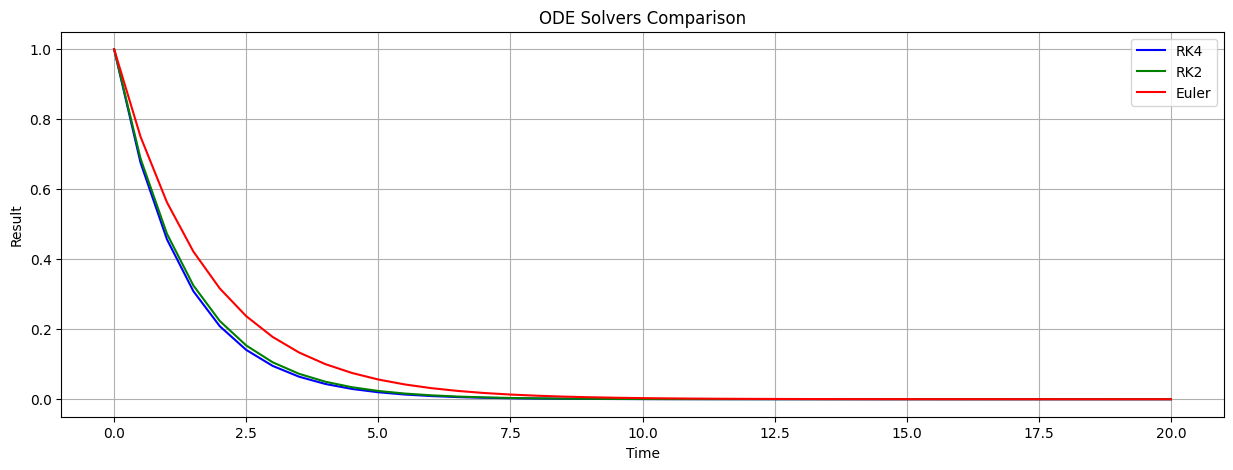

In [159]:
plt.figure(figsize=(15, 5))
# Plot RK4 results
plt.plot(timeRK4, resultRK4, label="RK4", color="blue")

# Plot RK2 results
plt.plot(timeRK2, resultRK2, label="RK2", color="green")

# Plot Euler results
plt.plot(timeE, resultE, label="Euler", color="red")
plt.xlabel("Time")
plt.ylabel("Result")
plt.title("ODE Solvers Comparison")
plt.legend()
plt.grid()
plt.show()

In [133]:
class ODE_Vsolver:
    ''' Class to solve ODE: dy/dt = f(y, t). This solver takes y as a vector. The predefined function, f(y, t), is e^t.
    The function can is an input argument and should be string containing Python expretion as a function of t only.
    Three methods are available: Euler, Runge Kutta 2snd order and Runge Kutta 4th order
    Parameters: 
    t0 : staring time
    tf : final simulation time
    f  : math function f(y, t), string
    y0 : initial condition at t0
    dt : time step'''

    def __init__(self, t0=0, tf=5, y0=[1], dt=1, function = 'math.exp(t)'):
        self.t0 = t0
        self.tf = tf
        self.function = function
        self.y0 = y0
        self.dt = dt
        
    def evaluate_equation(self, equation, t):
        '''Takes the equation, f(y, t), as an argument and calculates the equation with the input value for t'''
        try:
            result = [eval(equation, {"t": t, "y": y}) for y in self.y0]
            return result
        except Exception as e:
            print(f"\nError: {e}. The input function for f(y, t) should be a string containing a valid Python expression and a function of t only.")
            return [f"\nError: {e}"]

    def solve(self,  method='Euler'):
        '''select the solver'''
        match method:
            case 'euler':
                return self.euler_method()
            case 'rk2':
                return self.runge_kutta_2nd()
            case 'rk4':
                return self.runge_kutta_4th()
            case other:
                print("Invalid method specified. valid methods are: 'Euler', 'RK2', 'RK4'")
 
    def euler_method(self):
        ''' solving the ODE with Euler method'''
        print(f" Euler method is used to solve dy/dt = {self.function}.")
        # List of time steps and results used and calculated.
        time = [self.t0]
        results = [self.y0[:]]

        # start of the method
        t = self.t0
        y = self.y0[:]

        while t < self.tf:
            #  approximate the next value usin Euler's method
            [y += self.dt * self.evaluate_equation(self.function, t) for i in range(len(y)]
            # Increment time by dt
            t += self.dt
            #  Append the time-step and approximate to the lists
            time.append(t)
            results.append(y[:])

        return time, results

    def runge_kutta_2nd(self):
        ''' solving the ODE with runge_kutta 2nd order'''
        print(f" Runge_Kutta 2nd order method is used to solve dy/dt = {self.function}.")
                # List of time steps and results used and calculated.
        time = [self.t0]
        results = [self.y0[:]]

        # start of the method
        t = self.t0
        y = self.y0[:]

        while t < self.tf:
            # calculate the k values and approximate the next value 
            self.k1 = self.dt * self.evaluate_equation(self.function, t)
            k2 = self.dt * self.evaluate_equation(self.function + ' + 0.5 * self.k1', t + 0.5 * self.dt)
            y += k2
            #  increment time by dt
            t += self.dt
            #  Append the time-step and approximate to the lists
            time.append(t)
            results.append(y)
            
        return time, results

    def runge_kutta_4th(self):
        ''' solving the ODE with runge_kutta 4th order'''
        print(f" Runge_Kutta 4th order method is used to solve dy/dt = {self.function}.")
                # List of time steps and results used and calculated.
        time = [self.t0]
        results = [self.y0]

        # start of the method
        t = self.t0
        y = self.y0

        while t < self.tf:
            # calculate the k values and approximate the next value 
            self.k1 = self.dt * self.evaluate_equation(self.function, t)
            self.k2 = self.dt * self.evaluate_equation(self.function + ' + 0.5 * self.k1', t + 0.5 * self.dt)
            self.k3 = self.dt * self.evaluate_equation(self.function + ' + 0.5 * self.k2', t + 0.5 * self.dt)
            k4 = self.dt * self.evaluate_equation(self.function + ' + self.k3', t + self.dt)
            y += (self.k1 + 2 * self.k2 + 2 * self.k3 + k4) / 6
            #  increment time by dt
            t += self.dt
            #  Append the time-step and approximate to the lists
            time.append(t)
            results.append(y)
            
        return time, results



SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (2281481920.py, line 63)

In [144]:
c = ODE_Solver(dt = 1, tf = 20, y0 = 1, function = '-self.y/2')

In [145]:
time, result = c.solve('RK2')

 Runge_Kutta 2nd order method is used to solve dy/dt = -self.y/2.


In [146]:
time

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [147]:
result

[1,
 0.25,
 0.0625,
 0.015625,
 0.00390625,
 0.0009765625,
 0.000244140625,
 6.103515625e-05,
 1.52587890625e-05,
 3.814697265625e-06,
 9.5367431640625e-07,
 2.384185791015625e-07,
 5.960464477539063e-08,
 1.4901161193847656e-08,
 3.725290298461914e-09,
 9.313225746154785e-10,
 2.3283064365386963e-10,
 5.820766091346741e-11,
 1.4551915228366852e-11,
 3.637978807091713e-12,
 9.094947017729282e-13]